In [1]:
# Loading and Exploring The Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/heart.csv')

print("Heart Disease Dataset:\n")
display(df.head())

Heart Disease Dataset:



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check dataset shape
print(f"\nDataset Shape: {df.shape}")

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Check data types
print("\nData Types:")
display(df.dtypes)


Dataset Shape: (918, 12)

Missing Values:


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0



Data Types:


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [4]:
# Check Summary Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Visualization

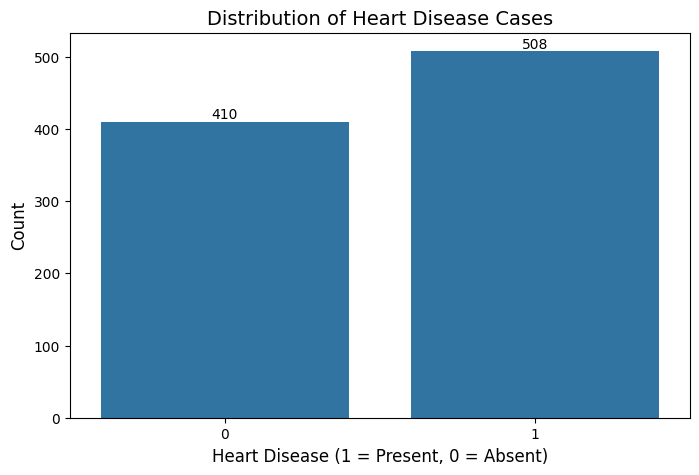

Percentage of patients with heart disease: 55.34%
Percentage of patients without heart disease: 44.66%


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distribution of target variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='HeartDisease', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Heart Disease Cases', fontsize=14)
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate percentage
heart_disease_percentage = df['HeartDisease'].value_counts(normalize=True) * 100
print(f"Percentage of patients with heart disease: {heart_disease_percentage[1]:.2f}%")
print(f"Percentage of patients without heart disease: {heart_disease_percentage[0]:.2f}%")

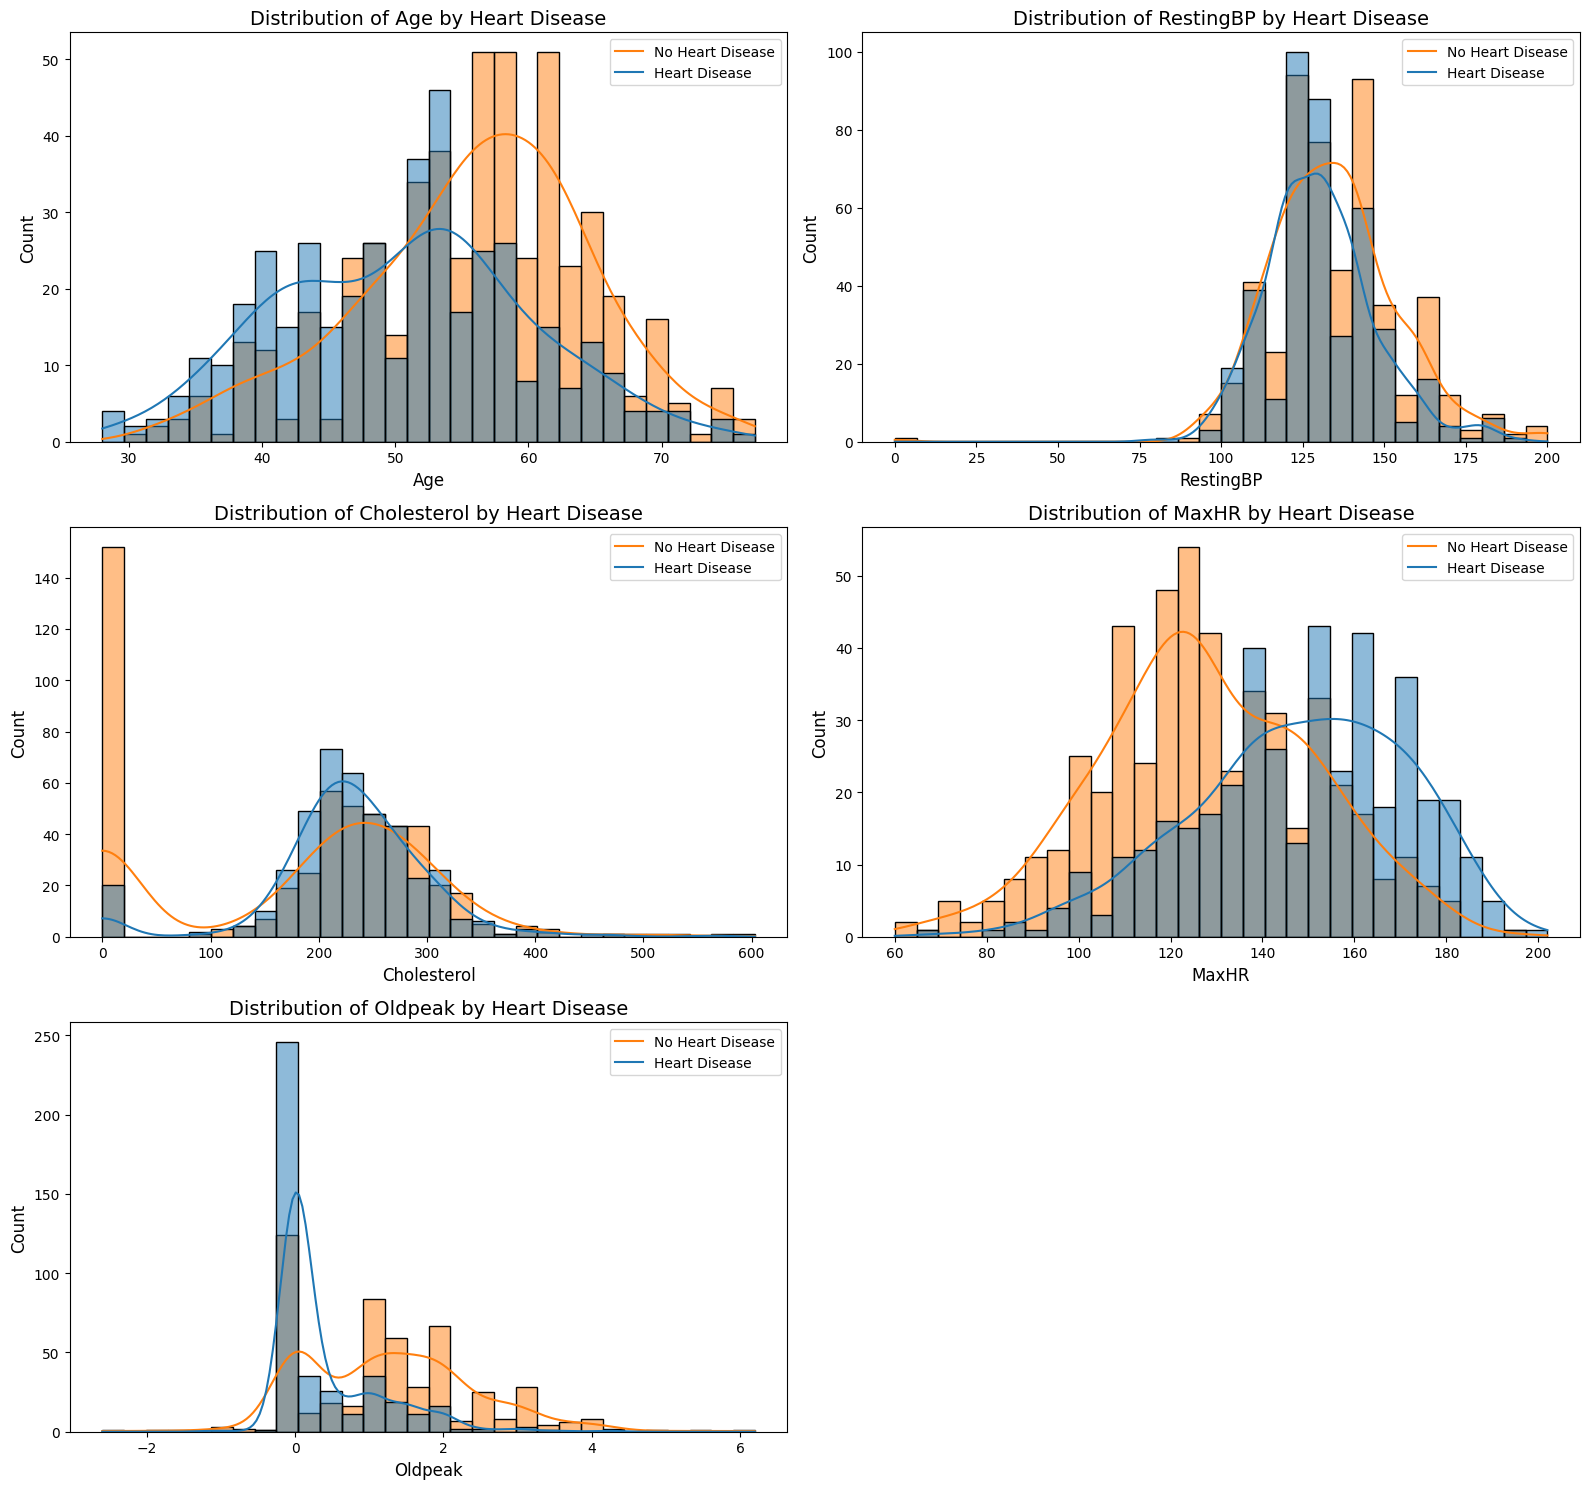

In [6]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    if i < len(continuous_features):
        sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Heart Disease', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].legend(['No Heart Disease', 'Heart Disease'])

if len(continuous_features) < len(axes):
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

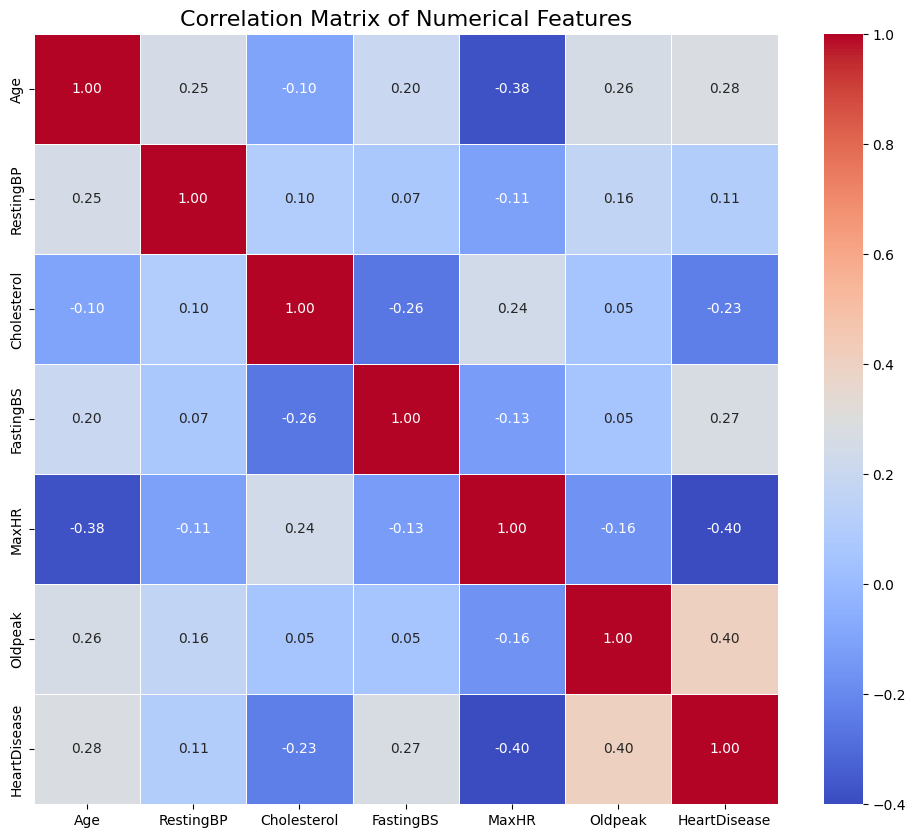

In [7]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [8]:
# Print correlations with target variable in descending order
print("Correlations with HeartDisease (target):")
target_correlations = correlation_matrix['HeartDisease'].sort_values(ascending=False)
display(target_correlations)

Correlations with HeartDisease (target):


,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421


In [ ]:
# Feature Binning

In [9]:
df_processed = df.copy()

features_to_bin = ['Age', 'Cholesterol']

if (df_processed['Cholesterol'] == 0).any():
    print(f"Number of zero values in Cholesterol: {(df_processed['Cholesterol'] == 0).sum()}")

    median_cholesterol = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
    df_processed.loc[df_processed['Cholesterol'] == 0, 'Cholesterol'] = median_cholesterol
    print(f"Replaced zero values with median: {median_cholesterol}")

Number of zero values in Cholesterol: 172
Replaced zero values with median: 237.0


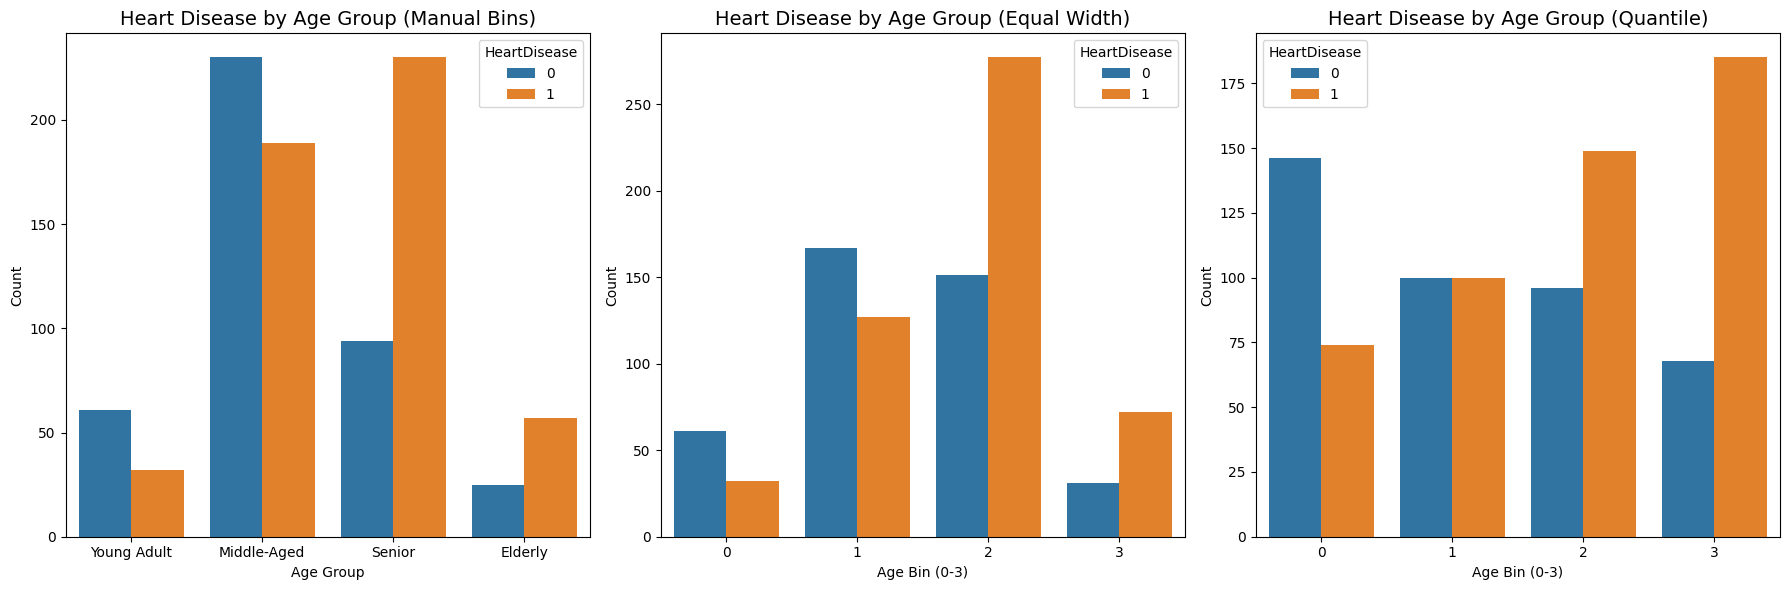

In [10]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

# Bin Age into categories

# Method 1: Manual Binning based on domain knowledge
age_bins = [0, 40, 55, 65, 100]
age_labels = ['Young Adult', 'Middle-Aged', 'Senior', 'Elderly']
df_processed['AgeBin'] = pd.cut(df_processed['Age'], bins=age_bins, labels=age_labels)

# Method 2: Equal-width binning using KBinsDiscretizer
kbins_age = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df_processed['AgeEqualWidth'] = kbins_age.fit_transform(df_processed[['Age']]).astype(int)

# Method 3: Equal-frequency binning (quantile-based)
kbins_age_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_processed['AgeQuantile'] = kbins_age_quantile.fit_transform(df_processed[['Age']]).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Manual bins
sns.countplot(x='AgeBin', hue='HeartDisease', data=df_processed, ax=axes[0])
axes[0].set_title('Heart Disease by Age Group (Manual Bins)', fontsize=14)
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Equal-width bins
sns.countplot(x='AgeEqualWidth', hue='HeartDisease', data=df_processed, ax=axes[1])
axes[1].set_title('Heart Disease by Age Group (Equal Width)', fontsize=14)
axes[1].set_xlabel('Age Bin (0-3)')
axes[1].set_ylabel('Count')

# Quantile bins
sns.countplot(x='AgeQuantile', hue='HeartDisease', data=df_processed, ax=axes[2])
axes[2].set_title('Heart Disease by Age Group (Quantile)', fontsize=14)
axes[2].set_xlabel('Age Bin (0-3)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

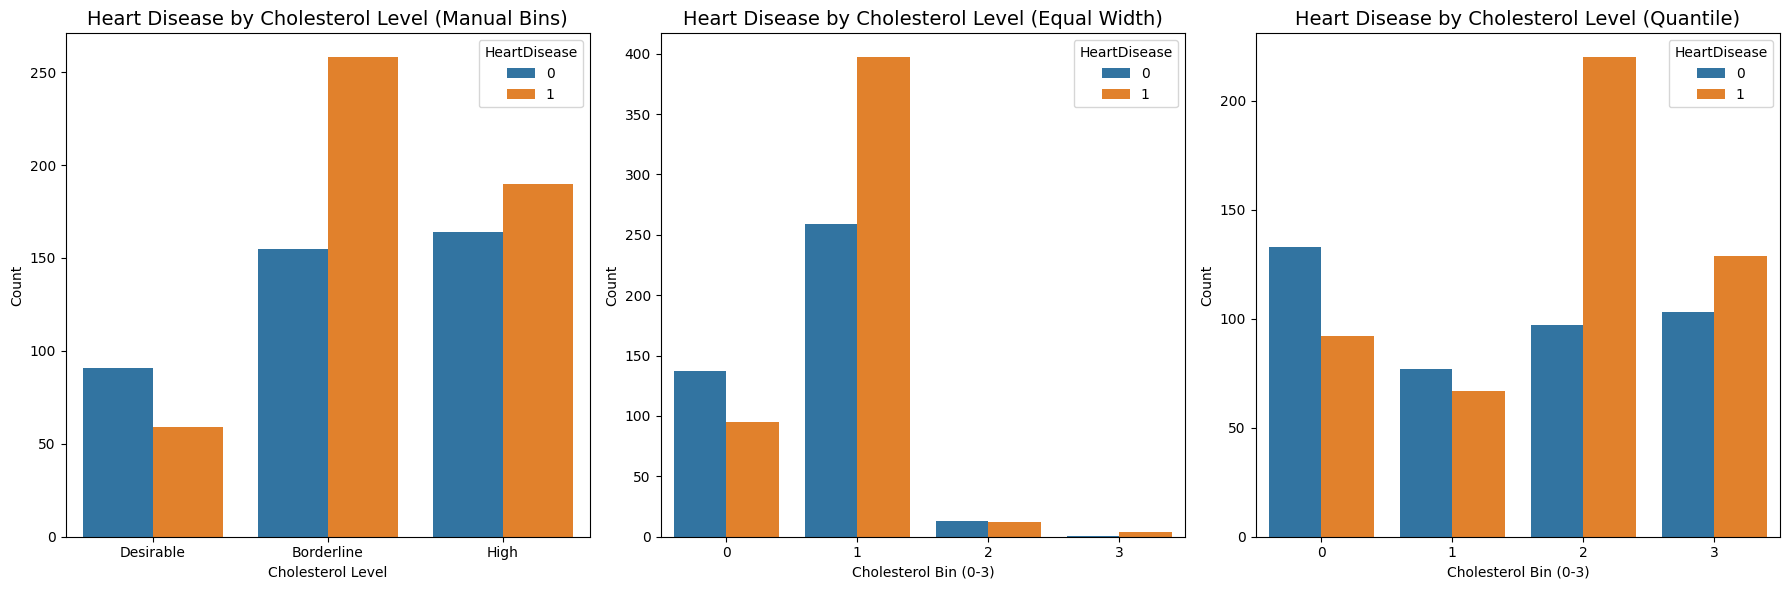

In [11]:
# Bin Cholesterol into categories

# Method 1: Manual Binning based on clinical categories
chol_bins = [0, 200, 240, 600]
chol_labels = ['Desirable', 'Borderline', 'High']
df_processed['CholesterolBin'] = pd.cut(df_processed['Cholesterol'], bins=chol_bins, labels=chol_labels)

# Method 2: Equal-width binning
kbins_chol = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df_processed['CholesterolEqualWidth'] = kbins_chol.fit_transform(df_processed[['Cholesterol']]).astype(int)

# Method 3: Equal-frequency binning (quantile-based)
kbins_chol_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_processed['CholesterolQuantile'] = kbins_chol_quantile.fit_transform(df_processed[['Cholesterol']]).astype(int)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Manual bins
sns.countplot(x='CholesterolBin', hue='HeartDisease', data=df_processed, ax=axes[0])
axes[0].set_title('Heart Disease by Cholesterol Level (Manual Bins)', fontsize=14)
axes[0].set_xlabel('Cholesterol Level')
axes[0].set_ylabel('Count')

# Equal-width bins
sns.countplot(x='CholesterolEqualWidth', hue='HeartDisease', data=df_processed, ax=axes[1])
axes[1].set_title('Heart Disease by Cholesterol Level (Equal Width)', fontsize=14)
axes[1].set_xlabel('Cholesterol Bin (0-3)')
axes[1].set_ylabel('Count')

# Quantile bins
sns.countplot(x='CholesterolQuantile', hue='HeartDisease', data=df_processed, ax=axes[2])
axes[2].set_title('Heart Disease by Cholesterol Level (Quantile)', fontsize=14)
axes[2].set_xlabel('Cholesterol Bin (0-3)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
df_processed = pd.get_dummies(df_processed, columns=['AgeBin', 'CholesterolBin'], drop_first=False)

binned_columns = [col for col in df_processed.columns if 'AgeBin_' in col or 'CholesterolBin_' in col]
print("New binned feature columns:")
print(binned_columns)

New binned feature columns:
['AgeBin_Young Adult', 'AgeBin_Middle-Aged', 'AgeBin_Senior', 'AgeBin_Elderly', 'CholesterolBin_Desirable', 'CholesterolBin_Borderline', 'CholesterolBin_High']


In [ ]:
# Feature Scaling

In [13]:
# Select numerical features for standardization
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

df_processed[['Age_scaled', 'RestingBP_scaled', 'Cholesterol_scaled',
              'MaxHR_scaled', 'Oldpeak_scaled']] = scaler.fit_transform(df_processed[numerical_features])

print("Before Scaling:")
display(df_processed[numerical_features].describe())

print("\nAfter Scaling:")
scaled_features = [col + '_scaled' for col in numerical_features]
display(df_processed[scaled_features].describe())

Before Scaling:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,243.204793,136.809368,0.887364
std,9.432617,18.514154,53.401297,25.460334,1.066570
min,28.000000,0.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,214.000000,120.000000,0.000000
50%,54.000000,130.000000,237.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000



After Scaling:


,Age_scaled,RestingBP_scaled,Cholesterol_scaled,MaxHR_scaled,Oldpeak_scaled
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.083616e-16,1.954380e-16,2.399436e-16,4.953675e-16,1.238419e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-7.154995e+00,-2.964180e+00,-3.018469e+00,-3.271482e+00
25%,-6.906294e-01,-6.699346e-01,-5.471911e-01,-6.605778e-01,-8.324324e-01
50%,5.188098e-02,-1.295128e-01,-1.162551e-01,4.678968e-02,-2.695748e-01
75%,6.883185e-01,4.109089e-01,4.458352e-01,7.541571e-01,5.747115e-01
max,2.491558e+00,3.653439e+00,6.741247e+00,2.561874e+00,4.983762e+00


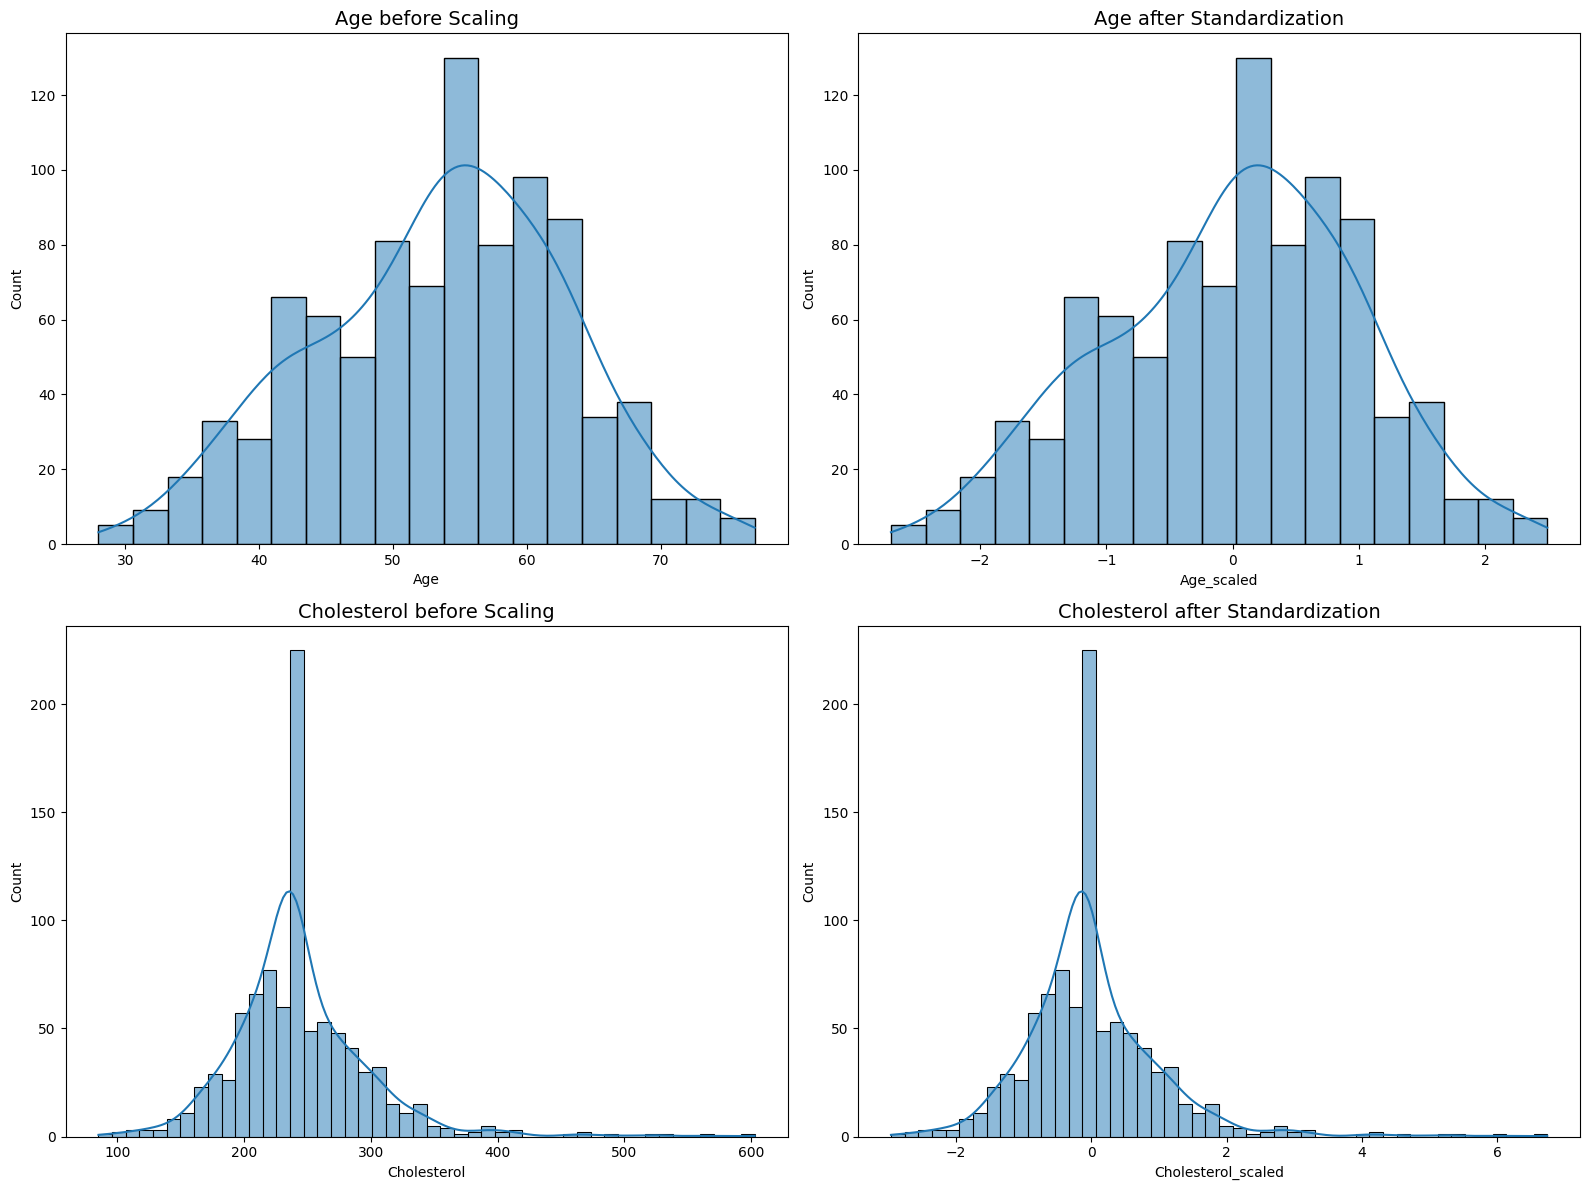

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age before scaling
sns.histplot(df_processed['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age before Scaling', fontsize=14)

# Age after scaling
sns.histplot(df_processed['Age_scaled'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age after Standardization', fontsize=14)

# Cholesterol before scaling
sns.histplot(df_processed['Cholesterol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol before Scaling', fontsize=14)

# Cholesterol after scaling
sns.histplot(df_processed['Cholesterol_scaled'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol after Standardization', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Interaction Terms

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Select features to create interaction terms
interaction_features = ['Age_scaled', 'RestingBP_scaled', 'Cholesterol_scaled', 'MaxHR_scaled', 'Oldpeak_scaled']

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(df_processed[interaction_features])

interaction_term_names = poly.get_feature_names_out(input_features=interaction_features)
interaction_only_names = [name for name in interaction_term_names if ' ' in name]  # Only keep interaction terms

interaction_df = pd.DataFrame(interaction_terms, columns=interaction_term_names)

interaction_df = interaction_df[interaction_only_names]

df_processed = pd.concat([df_processed.reset_index(drop=True), interaction_df.reset_index(drop=True)], axis=1)

print(f"Created {len(interaction_only_names)} interaction terms:")
display(interaction_only_names)

display(df_processed[interaction_only_names].head())

Created 10 interaction terms:


['Age_scaled RestingBP_scaled',
 'Age_scaled Cholesterol_scaled',
 'Age_scaled MaxHR_scaled',
 'Age_scaled Oldpeak_scaled',
 'RestingBP_scaled Cholesterol_scaled',
 'RestingBP_scaled MaxHR_scaled',
 'RestingBP_scaled Oldpeak_scaled',
 'Cholesterol_scaled MaxHR_scaled',
 'Cholesterol_scaled Oldpeak_scaled',
 'MaxHR_scaled Oldpeak_scaled']

,Age_scaled RestingBP_scaled,Age_scaled Cholesterol_scaled,Age_scaled MaxHR_scaled,Age_scaled Oldpeak_scaled,RestingBP_scaled Cholesterol_scaled,RestingBP_scaled MaxHR_scaled,RestingBP_scaled Oldpeak_scaled,Cholesterol_scaled MaxHR_scaled,Cholesterol_scaled Oldpeak_scaled,MaxHR_scaled Oldpeak_scaled
0,-0.588890,-1.229684,-1.981929,1.192992,0.352574,0.568258,-0.342054,1.186601,-0.714256,-1.151194
1,-0.713779,0.566633,-0.360852,-0.050558,-1.766573,1.125016,0.157624,-0.893093,-0.125130,0.079687
2,0.226823,-1.305842,2.671063,1.457888,-0.096567,0.197525,0.107811,-1.137168,-0.620676,1.269574
3,-0.177018,0.319864,0.661809,-0.335951,-0.165703,-0.342845,0.174037,0.619506,-0.314477,-0.650663
4,0.049356,-0.046858,-0.030194,-0.043187,-0.859224,-0.553657,-0.791918,0.525635,0.751838,0.484460


In [16]:
interaction_corr = df_processed[interaction_only_names + ['HeartDisease']].corr()['HeartDisease'].drop('HeartDisease')
top_interactions = interaction_corr.abs().sort_values(ascending=False).head(10)

print("Top 10 interaction terms by correlation with Heart Disease:")
display(top_interactions)


Top 10 interaction terms by correlation with Heart Disease:


,HeartDisease
Age_scaled Cholesterol_scaled,0.108003
Age_scaled MaxHR_scaled,0.090536
MaxHR_scaled Oldpeak_scaled,0.066384
RestingBP_scaled Oldpeak_scaled,0.052332
Age_scaled Oldpeak_scaled,0.047003
Cholesterol_scaled MaxHR_scaled,0.036588
RestingBP_scaled MaxHR_scaled,0.035658
Cholesterol_scaled Oldpeak_scaled,0.033580
Age_scaled RestingBP_scaled,0.032344
RestingBP_scaled Cholesterol_scaled,0.017183


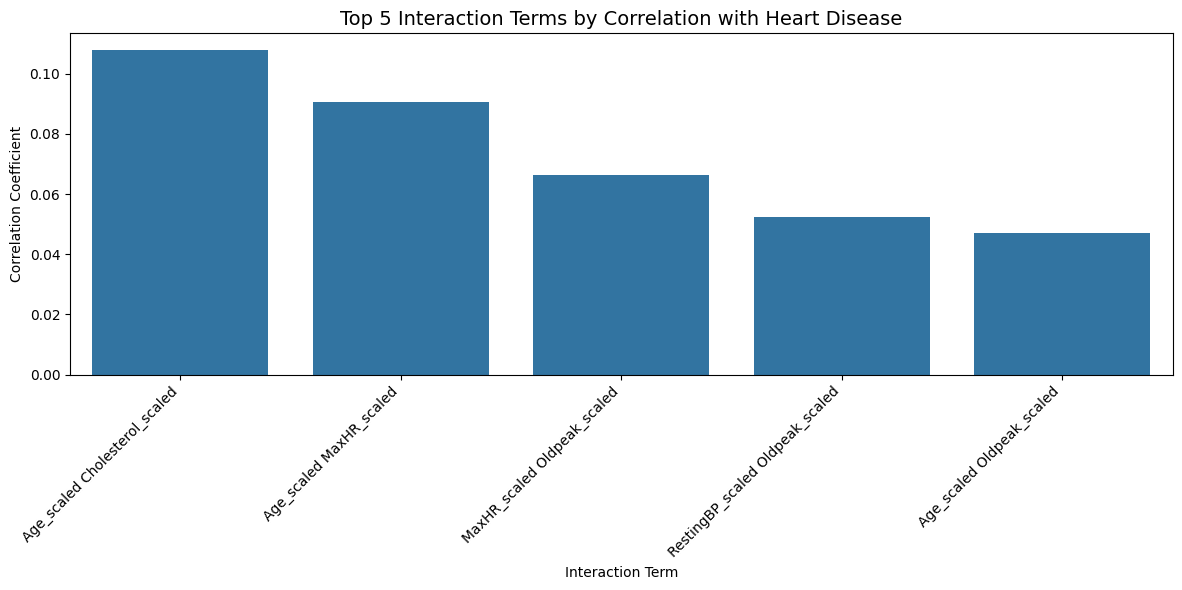

In [17]:
# Visualize top 5 interaction terms
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_interactions.head(5).index, y=top_interactions.head(5).values)
plt.title('Top 5 Interaction Terms by Correlation with Heart Disease', fontsize=14)
plt.xlabel('Interaction Term')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Data Preprocessing and Split

In [18]:
df_processed = pd.get_dummies(df_processed,
                            columns=[col for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
                                    if col in df_processed.columns],
                            drop_first=True)
y = df_processed['HeartDisease']

feature_groups = {
    'original_numeric': [col for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
                       if col in df_processed.columns],
    'one_hot': [col for col in df_processed.columns if any(cat in col for cat in
                ['Sex_', 'ChestPainType_', 'RestingECG_', 'ExerciseAngina_', 'ST_Slope_'])],
    'scaled': [col for col in df_processed.columns if '_scaled' in col],
    'binned': [col for col in df_processed.columns if any(pattern in col for pattern in
               ['AgeBin_', 'CholesterolBin_', 'AgeEqual', 'CholesterolEqual', 'AgeQuantile', 'CholesterolQuantile'])]
}

original_features = feature_groups['original_numeric'] + feature_groups['one_hot']

feature_sets = {
    'Original Features': df_processed[original_features],
    'Original + Scaled': df_processed[original_features + feature_groups['scaled']],
    'Original + Binned': df_processed[original_features + feature_groups['binned']],
    'Original + Interaction': df_processed[original_features + interaction_only_names],
    'All Features': df_processed[original_features + feature_groups['scaled'] +
                                feature_groups['binned'] + interaction_only_names]
}

print(f"\nFeature set dimensions:")
for name, X in feature_sets.items():
    print(f"{name}: {X.shape}")


Feature set dimensions:
Original Features: (918, 15)
Original + Scaled: (918, 30)
Original + Binned: (918, 26)
Original + Interaction: (918, 25)
All Features: (918, 51)


In [19]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets for all feature combinations
test_size = 0.20
random_state = 42
train_test_data = {}

for name, X in feature_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)
    train_test_data[name] = (X_train, X_test, y_train, y_test)
    print(f"{name}: Train {X_train.shape}, Test {X_test.shape}")

Original Features: Train (734, 15), Test (184, 15)
Original + Scaled: Train (734, 30), Test (184, 30)
Original + Binned: Train (734, 26), Test (184, 26)
Original + Interaction: Train (734, 25), Test (184, 25)
All Features: Train (734, 51), Test (184, 51)


In [ ]:
# Model Building and Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Define evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    return {
        'accuracy': acc,
        'classification_report': report,
        'auc': auc,
        'y_prob': y_prob
    }

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    model_results = {}

    for feature_set_name, (X_train, X_test, y_train, y_test) in train_test_data.items():
        print(f"Evaluating {model_name} with {feature_set_name}...")
        model_results[feature_set_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

    results[model_name] = model_results

Evaluating Logistic Regression with Original Features...
Evaluating Logistic Regression with Original + Scaled...
Evaluating Logistic Regression with Original + Binned...
Evaluating Logistic Regression with Original + Interaction...
Evaluating Logistic Regression with All Features...
Evaluating Random Forest with Original Features...
Evaluating Random Forest with Original + Scaled...
Evaluating Random Forest with Original + Binned...
Evaluating Random Forest with Original + Interaction...
Evaluating Random Forest with All Features...


In [22]:
# Display comparison of model performance
performance_df = pd.DataFrame(
    columns=['Model', 'Feature Set', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-Score (1)', 'AUC']
)

row = 0
for model_name, model_results in results.items():
    for feature_set_name, metrics in model_results.items():
        performance_df.loc[row] = [
            model_name,
            feature_set_name,
            metrics['accuracy'],
            metrics['classification_report']['1']['precision'],
            metrics['classification_report']['1']['recall'],
            metrics['classification_report']['1']['f1-score'],
            metrics['auc'] if metrics['auc'] else 0
        ]
        row += 1

# Display sorted by accuracy
display(performance_df.sort_values('Accuracy', ascending=False))

,Model,Feature Set,Accuracy,Precision (1),Recall (1),F1-Score (1),AUC
4,Logistic Regression,All Features,0.902174,0.911765,0.911765,0.911765,0.929818
2,Logistic Regression,Original + Binned,0.891304,0.901961,0.901961,0.901961,0.936872
1,Logistic Regression,Original + Scaled,0.885870,0.893204,0.901961,0.897561,0.926829
0,Logistic Regression,Original Features,0.885870,0.885714,0.911765,0.898551,0.933046
3,Logistic Regression,Original + Interaction,0.885870,0.893204,0.901961,0.897561,0.926471
7,Random Forest,Original + Binned,0.875000,0.891089,0.882353,0.886700,0.925574
5,Random Forest,Original Features,0.864130,0.873786,0.882353,0.878049,0.927846
9,Random Forest,All Features,0.842391,0.854369,0.862745,0.858537,0.906444
8,Random Forest,Original + Interaction,0.836957,0.846154,0.862745,0.854369,0.911645
6,Random Forest,Original + Scaled,0.831522,0.851485,0.843137,0.847291,0.910270
